## Week 7: End-to-End Data Science Project

### **Project Title: Mall Customer Segmentation Using Unsupervised Learning**

* **Project Title:** End-to-End Data Science Project on a Chosen Topic
* **Description:** Select a topic (e.g., customer segmentation, predictive maintenance, or sales forecasting). Perform all steps from data collection, cleaning, and EDA to model building, evaluation, and deployment (if applicable). Document the process and findings in a comprehensive report.
* **Dataset Reference:** Mall Customer Segmentation Data

#### Steps to complete End-to-End Data Science Project
1. Study the dataset
2. Data Preprocessing & Cleaning
3. EDA
4. Feature Engineering
5. Model Selection & Training (Clustering - KMeans)
6. Model Evaluation
7. Save the final clustered dataset as a CSV

### 1. Study the dataset:
#### 1.1 Import Libraries

In [101]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


#### 1.2 Load and Inspect the Data

In [148]:
df = pd.read_csv('Mall_Customers.csv')


In [103]:
print(f"Shape: {df.shape}")
df.head()

Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 1.3 Basic Data Summary

In [4]:
# Data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns.values

array(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'], dtype=object)

In [4]:
# Summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.shape

(200, 5)

### 2. Data Preprocessing & Cleaning

In [149]:
# Drop Irrelevant Columns
# CustomerID is not useful for modeling, so we drop it.
df.drop('CustomerID', axis=1, inplace=True)

In [104]:
# Handle Missing Values

print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


* In this dataset, there are no missing values

In [106]:
# Handle Duplicates
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [150]:
# Encode Categorical Features
# We’ll convert the 'Gender' column into numeric format using Label Encoding or One-Hot Encoding:

# Label Encoding (0 for Female, 1 for Male)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [10]:
print(df.dtypes)

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [151]:
# Final Cleaned Dataset Preview
print(df.head())
print(df.describe())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40
           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000     

### 3. EDA

##### Gender Distribution

C:\Users\smith\AppData\Local\Temp\ipykernel_22440\3031053894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


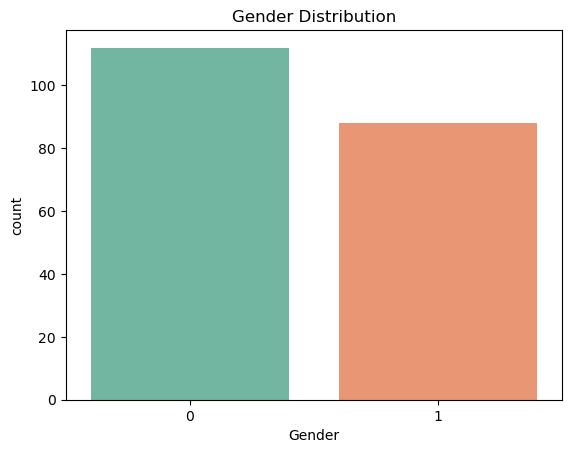

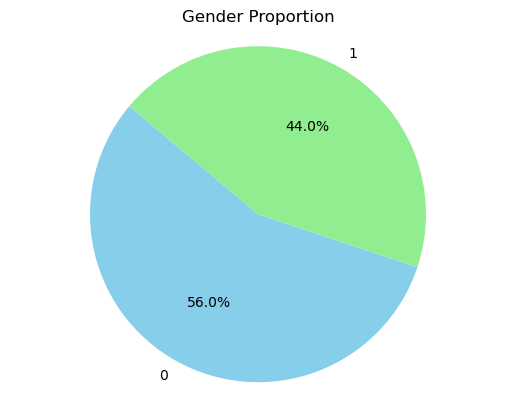

In [152]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

# Pie chart
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title("Gender Proportion")
plt.axis('equal')
plt.show()

##### Univariate Analysis
* Distribution Plots for Age, Annual Income, and Spending Score


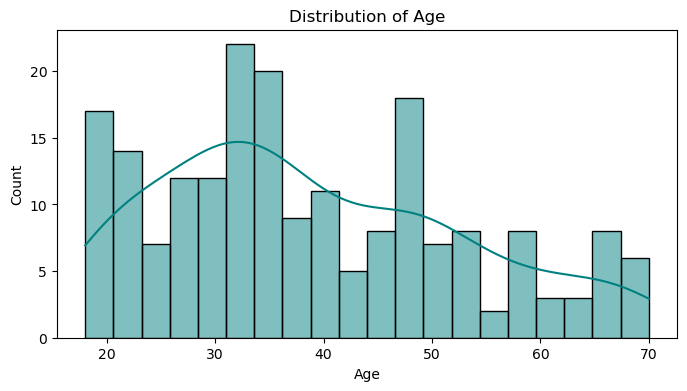

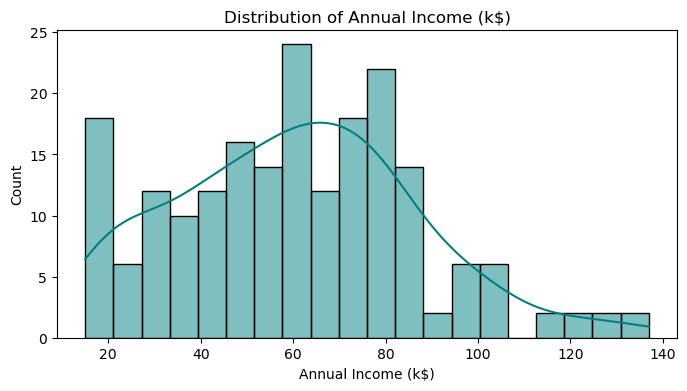

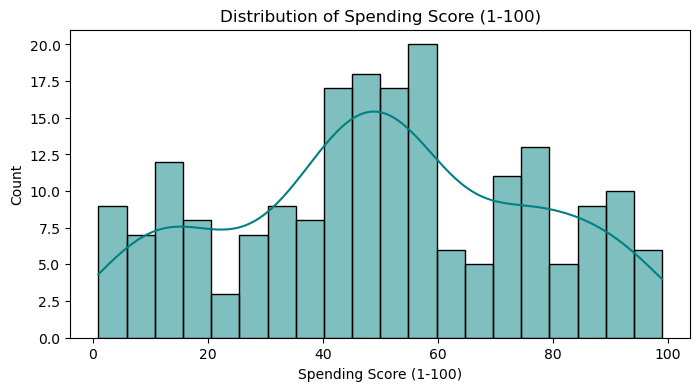

In [13]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='teal', bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

##### Boxplots to Detect Outliers


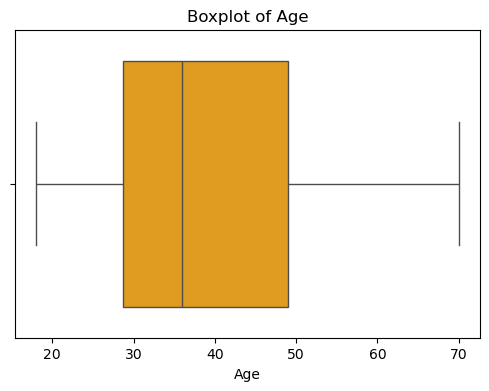

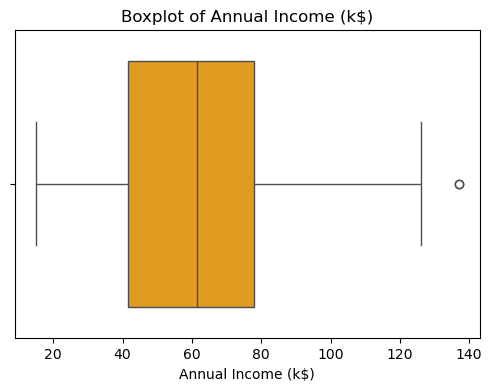

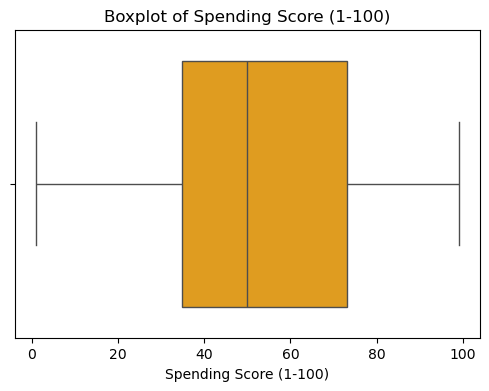

In [153]:
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

* We can see from the box plot that the Annual Income (k$) feature shows some outliers. 

In [154]:
# let me calculate inter quartile range
i25 = df['Annual Income (k$)'].quantile(0.25)
i75 = df['Annual Income (k$)'].quantile(0.75)
Iqr = i75 - i25
upper_limit = i75 + 1.5*Iqr
lower_limit = i25 - 1.5*Iqr

In [155]:
# generate the list of outliers from the data
df[df['Annual Income (k$)'] > upper_limit]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,1,32,137,18
199,1,30,137,83


#### Handling outlier using capping by IQR

In [156]:
new_df = df.copy()

In [157]:
new_df['Annual Income (k$)'] = np.where(new_df['Annual Income (k$)'] > upper_limit, upper_limit, np.where(new_df['Annual Income (k$)'] < lower_limit, lower_limit, new_df['Annual Income (k$)']))

In [158]:
new_df[new_df['Annual Income (k$)'] > upper_limit]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [159]:
df[df['Annual Income (k$)'] < lower_limit]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


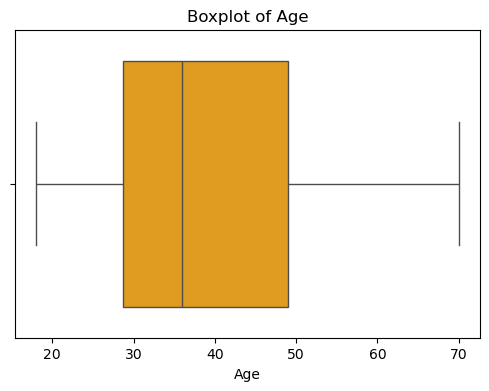

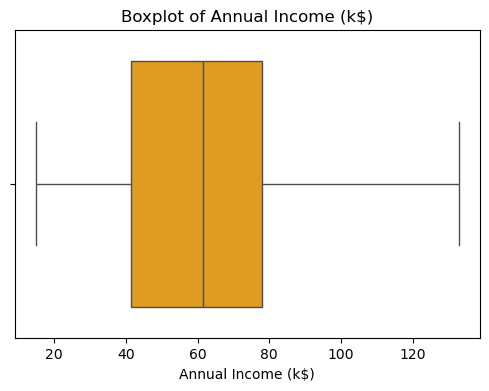

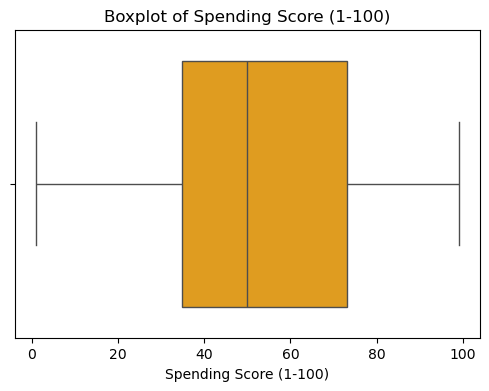

In [160]:
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=new_df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

##### Bivariate Analysis
* Gender vs Numerical Features


C:\Users\smith\AppData\Local\Temp\ipykernel_22440\3008383636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=col, data=new_df, palette='Pastel1')


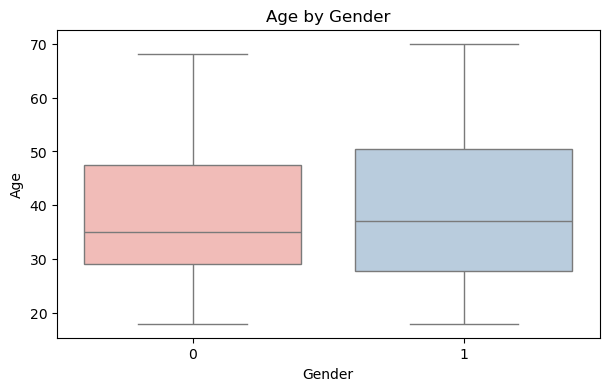

C:\Users\smith\AppData\Local\Temp\ipykernel_22440\3008383636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=col, data=new_df, palette='Pastel1')


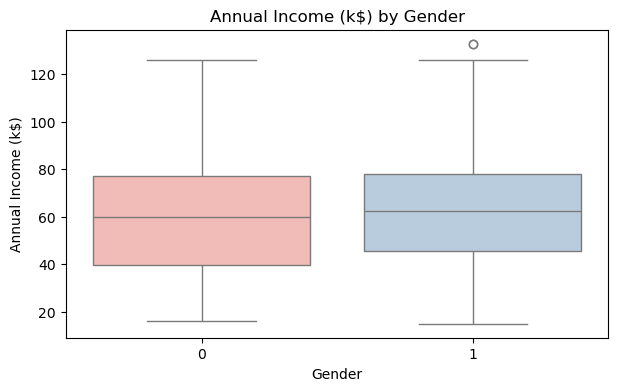

C:\Users\smith\AppData\Local\Temp\ipykernel_22440\3008383636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=col, data=new_df, palette='Pastel1')


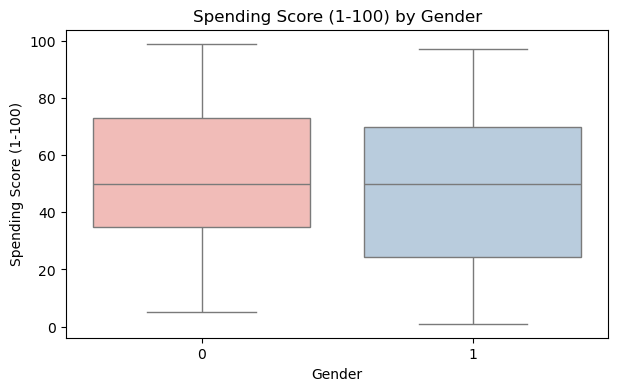

In [161]:
for col in features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='Gender', y=col, data=new_df, palette='Pastel1')
    plt.title(f'{col} by Gender')
    plt.show()

##### Pairplot

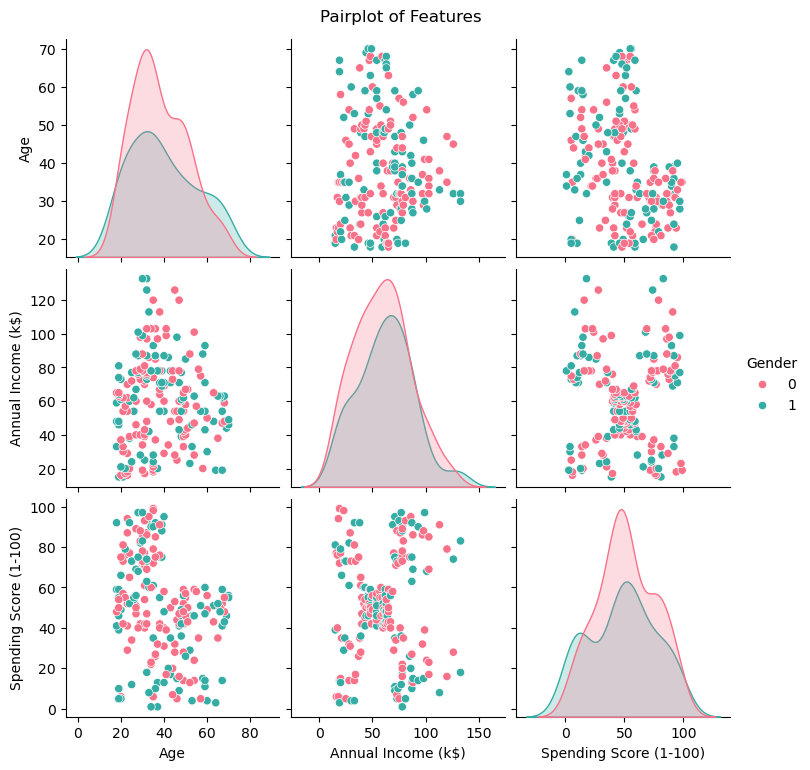

In [162]:
sns.pairplot(new_df, hue='Gender', palette='husl')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

##### Correlation Matrix

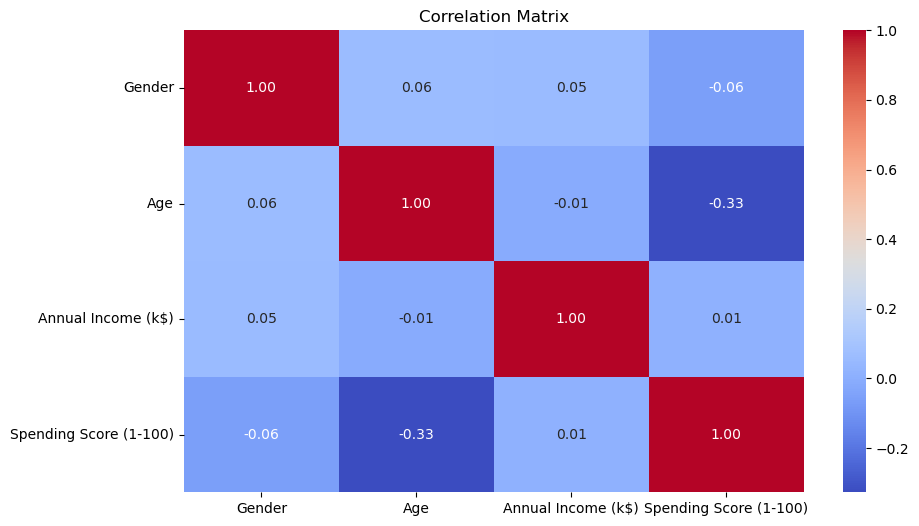

In [163]:
corr_matrix = new_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [164]:
new_df.corr()['Age'].sort_values(ascending= False)

Age                       1.000000
Gender                    0.060867
Annual Income (k$)       -0.011537
Spending Score (1-100)   -0.327227
Name: Age, dtype: float64

In [165]:
# Calculate the Pearson correlation coefficient between the two variables
correlation = new_df['Annual Income (k$)'].corr(new_df['Spending Score (1-100)'])

# Print the correlation
print(f"Correlation between Annual Income and Spending Score: {correlation}")

Correlation between Annual Income and Spending Score: 0.009929765454521898


* **There is no relationship between annual income and spending score.**

##### Scatter Plots for Pattern Discovery

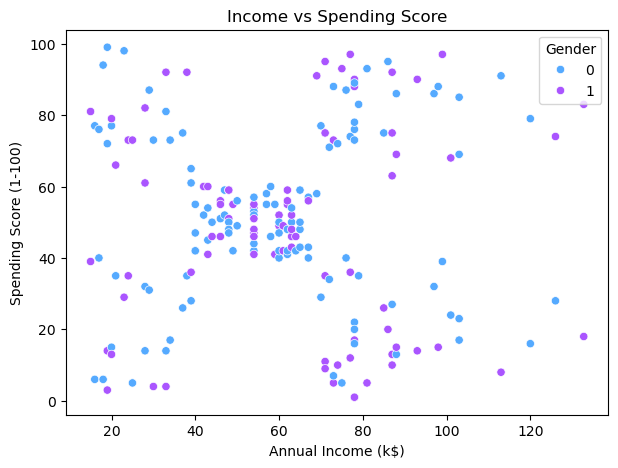

In [166]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=new_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='cool')
plt.title('Income vs Spending Score')
plt.show()


### 4. Feature Engineering

##### Encode Categorical Variable (Gender)
* Convert the 'Gender' column into numerical format:


In [167]:
# Using Label Encoding (Female = 0, Male = 1)
le = LabelEncoder()
new_df['Gender'] = le.fit_transform(df['Gender'])

# Check encoded values
print(new_df['Gender'].value_counts())  # 0 for Female, 1 for Male

Gender
0    112
1     88
Name: count, dtype: int64


### Feature Selection
##### We now select the relevant features to feed into the clustering algorithm. Typically, we choose:

* Age

* Annual Income (k$)

* Spending Score (1-100)

* You can also include Gender if it adds value.

In [168]:
features = new_df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [169]:
# Let me exclude Gender:

features = new_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

##### Feature Scaling
* Scale the selected features using MinMaxScaler or StandardScaler (K-Means is sensitive to scale).


In [170]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Convert to DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
print(features_scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008493                0.051020
3  0.096154            0.008493                0.775510
4  0.250000            0.016985                0.397959


### 5. Model Selection & Training (Clustering - KMeans)



##### Choose Features
* Use features you engineered earlier. Commonly used are:


In [171]:
# Select features for clustering
X = new_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Elbow Method to Find Optimal K
* This helps determine the optimal number of clusters (K) using the Within-Cluster-Sum-of-Squares (WCSS).


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

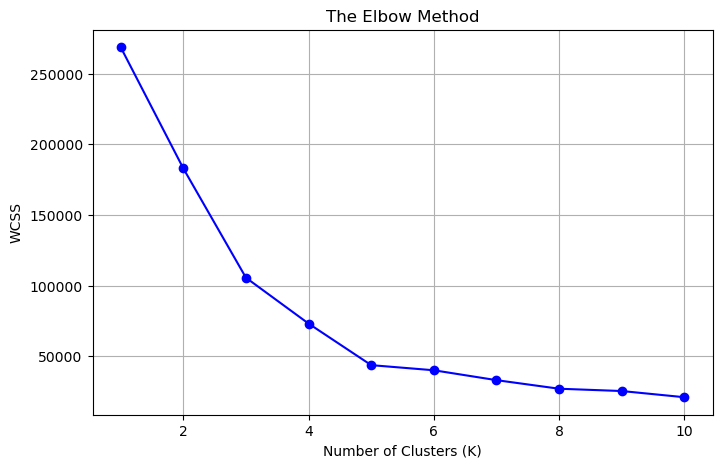

In [172]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.grid(True)
plt.show()

* I can't easly understand which one is the optimal K value. So, Better to apply another techniques

##### Silhouette Score for Validation
This metric helps validate the choice of K by evaluating the separation distance between clusters.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

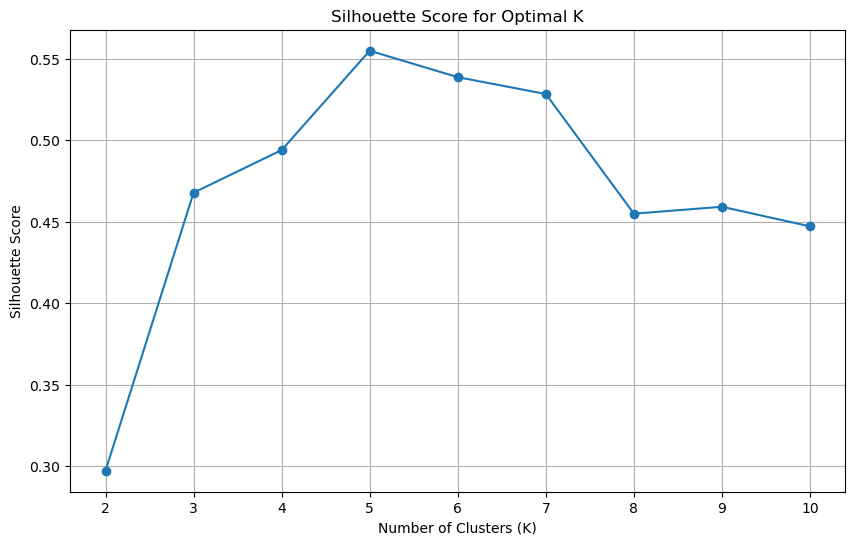

In [173]:
from sklearn.metrics import silhouette_score
sil_scores = []
for k in range(2, 11):  # Start from 2 because silhouette score needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(score)

# Plot Silhouette Scores for each K value
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

* **As shown in the Silhouette Score, the optimal K values is 5**

In [174]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

Silhouette Score for 2 clusters: 0.3950
Silhouette Score for 3 clusters: 0.4679
Silhouette Score for 4 clusters: 0.4946
Silhouette Score for 5 clusters: 0.5550
Silhouette Score for 6 clusters: 0.5140
Silhouette Score for 7 clusters: 0.5026
Silhouette Score for 8 clusters: 0.4659
Silhouette Score for 9 clusters: 0.4380
Silhouette Score for 10 clusters: 0.4338


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

* The Silhouette Score is highest at K = 5 (0.5550).

* This means the clusters at K=5 are better defined, i.e. the samples are well-separated and cohesive.

In [137]:
# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Print the coordinates of the centroids
print(kmeans.cluster_centers_)
# We've already scaled the features and let me assign it to x
X = features_scaled_df.copy()

[[0.5        0.6368719  0.17278912]
 [0.28605769 0.60291932 0.82168367]
 [0.17576923 0.31184713 0.41265306]
 [0.13986014 0.0911021  0.79962894]
 [0.72214854 0.28435464 0.41608023]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


##### Train Final K-Means Model
Let’s say the elbow and silhouette score suggest K = 5.


In [175]:
k = 5
final_kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = final_kmeans.fit_predict(X)

# Add cluster label to original DataFrame
new_df['Cluster'] = clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


##### Visualize the Clusters
Using two or three features for plotting (e.g., Income and Spending Score):


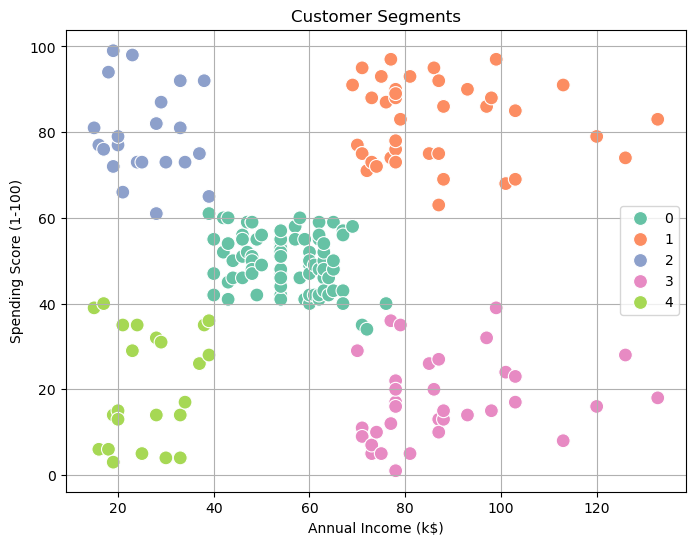

In [176]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

##### Inspect Cluster Centers
Interpret the customer segments)


In [177]:
# Reverse scale to original values if needed
cluster_centers = final_kmeans.cluster_centers_

# Display cluster centers (on scaled features)
print("Cluster Centers (scaled):")
print(cluster_centers)

Cluster Centers (scaled):
[[55.2962963  49.51851852]
 [86.42948718 82.12820513]
 [25.72727273 79.36363636]
 [88.07857143 17.11428571]
 [26.30434783 20.91304348]]


### 6. Model Evaluation


#### Silhouette Score
* Measures how well each point lies within its cluster (range from -1 to 1). Higher is better.


In [178]:
# Assuming 'X' is your scaled feature set and 'df["Cluster"]' has the predicted cluster labels
silhouette_avg = silhouette_score(X, new_df["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5550


#### Cluster Distribution
* Check if clusters are balanced or skewed.


Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


C:\Users\smith\AppData\Local\Temp\ipykernel_22440\1248971567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=new_df, palette='Set2')


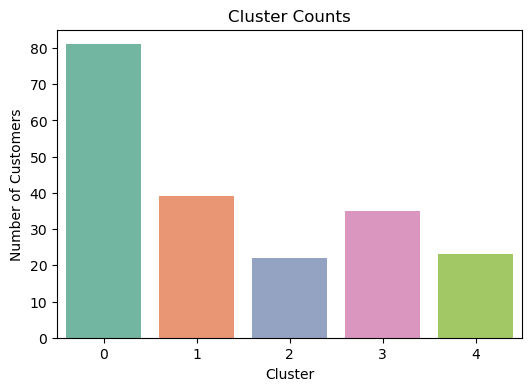

In [179]:
cluster_counts = new_df['Cluster'].value_counts().sort_index()
print(cluster_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=new_df, palette='Set2')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

### **Evaluating the quality of clustering using the `Davies-Bouldin Index (DBI)`**

In [180]:
# Assume X is your input feature matrix
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)  # This assigns cluster labels to each sample

# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {dbi:.4f}")


Davies-Bouldin Index: 0.5718


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### A lower DBI value indicates better clustering, where clusters are more compact and well-separated.
#### Explanation:
* The Davies-Bouldin Index (DBI) measures the average similarity ratio of each cluster with the cluster that most resembles it. Specifically, it considers the compactness (how close the points within the cluster are to the centroid) and the separation (how distinct the clusters are from each other).

#### A lower DBI value indicates that:

* The clusters are more compact, meaning the points within each cluster are closer to the centroid.
The clusters are better separated from each other, meaning there is a larger distance between the centroids of different clusters.
#### A higher DBI value suggests that:

* The clusters are less compact and/or not well-separated, meaning there is significant overlap between clusters, or the clusters are spread out more.

#### Cluster Profiling (Interpret the Segments)
* Let’s understand our data by analyzing average stats.


In [181]:
# Group by Cluster and show mean values
cluster_profiles = new_df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profiles)

# add Gender mode for each cluster
mode_gender = new_df.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0])
cluster_profiles['Most Common Gender'] = mode_gender
print(cluster_profiles)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.407407  42.716049           55.296296               49.518519
1        0.461538  32.692308           86.429487               82.128205
2        0.409091  25.272727           25.727273               79.363636
3        0.542857  41.114286           88.078571               17.114286
4        0.391304  45.217391           26.304348               20.913043
           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.407407  42.716049           55.296296               49.518519   
1        0.461538  32.692308           86.429487               82.128205   
2        0.409091  25.272727           25.727273               79.363636   
3        0.542857  41.114286           88.078571               17.114286   
4        0.391304  45.217391     


### **Cluster 0:**
- **Average Age:** ~43
- **Average Income:** ~$55k
- **Spending Score:** ~50
- **Most Common Gender:** Female (0)

---

### **Cluster 1:**
- **Average Age:** ~33
- **Average Income:** ~$86.5k
- **Spending Score:** ~82
- **Most Common Gender:** Female (0)

---

### **Cluster 2:**
- **Average Age:** ~25
- **Average Income:** ~$25.7k
- **Spending Score:** ~79
- **Most Common Gender:** Female (0)

---

### **Cluster 3:**
- **Average Age:** ~41
- **Average Income:** ~$88.2k
- **Spending Score:** ~17
- **Most Common Gender:** Male (1)

---

### **Cluster 4:**
- **Average Age:** ~45
- **Average Income:** ~$26.3k
- **Spending Score:** ~21
- **Most Common Gender:** Female (0)


### **Insights and Conclusion:**

1. **Gender Distribution:**  
  Most clusters have a **lower average Gender value**, meaning **Female (0)** is the most common gender across the majority of clusters. This might indicate a gender imbalance in the dataset skewed towards females.

2. **Cluster 1** stands out as your **premium target group**:  
  - Relatively **young (33 years)**  
  - **High income ($86.4k)**  
  - **Very high spending (82.1)**  
  These individuals are ideal for **luxury products, premium services**, and exclusive marketing campaigns.

3. **Cluster 3** has a **high income ($88.1k)** but **very low spending (17.1)**. These could be **financially conservative**, **analytical**, or focused on saving rather than consumption.


4. **Cluster 2**, on the other hand, consists of **very young individuals (25 years)** with **low income ($25.7k)** but surprisingly **high spending (79.4)**. These may be **students, young professionals, or aspirational buyers** driven by lifestyle and brand appeal.

5. **Cluster 4** is the **oldest group (45 years)** with **low income ($26.3k)** and **low spending (20.9)**. Likely **budget-conscious or possibly retired** individuals who are **less responsive to aggressive marketing** but may value **discounts or loyalty rewards**.

7. **Cluster 0** is a **middle-ground segment**:
  - **Average age (43 years)**  
  - **Moderate income ($55.3k)**  
  - **Balanced spending (49.5)**  
  This group could represent **stable, practical consumers**, possibly loyal customers responsive to value-based offers.



### 6. Save the final clustered dataset as a CSV

In [98]:
df['Cluster'] = labels
 
# Save to CSV
df.to_csv('clustered_customers.csv', index=False)
